In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

#path = "/content/drive/MyDrive/Data Science/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina.csv"
#path2 = "/content/drive/MyDrive/Data Science/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina2.csv"

data = pd.read_csv('/content/drive/MyDrive/Projects/RNN/Physical Properties.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Projects/RNN/Physical Properties.csv')


In [ ]:
unnamed_columns = [col for col in data.columns if col.startswith("Unnamed")]


data.drop(unnamed_columns, axis=1, inplace=True)

In [ ]:
data.drop("Remarks", axis=1, inplace=True)

In [ ]:
data

,Sample No.,Pre-classification,Weight of Coconut (grams),Volume of Coconut (cubic cm),Volume of Water (mL),Meat Thickness(mm),Post-classification,radius (cm),radius 1 (cm),radius 2 (cm),radius 3 (cm),height 1 (cm),height 2 (cm),height 3 (cm),Angle in Radian,Angle,Hypo 1,Hypo 2
0,1,2,3560,5080.787793,700,6,1,12.732395,11.618311,6.491025,10.785088,25.5,12.604563,20.942966,0.24728,14.168107,13,21.6
1,2,4,2020,7240.772525,330,12,3,12.732395,11.618311,6.491025,12.083293,25.5,12.604563,23.463878,0.24728,14.168107,13,24.2
2,3,1,3540,4852.084866,700,7,2,12.732395,11.618311,6.491025,10.635295,25.5,12.604563,20.652091,0.24728,14.168107,13,21.3
3,4,2,3380,4406.925901,750,3,1,12.732395,11.618311,6.491025,10.335709,25.5,12.604563,20.070342,0.24728,14.168107,13,20.7
4,5,4,1730,5235.553072,300,11.5,3,12.732395,11.618311,6.491025,10.884950,25.5,12.604563,21.136882,0.24728,14.168107,13,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,4,1820,3907.831926,300,11,3,12.732395,11.618311,6.491025,9.986193,25.5,12.604563,19.391635,0.24728,14.168107,13,20.0
130,131,4,1210,4776.762955,-,-,-,12.732395,11.618311,6.491025,10.585364,25.5,12.604563,20.555133,0.24728,14.168107,13,21.2
131,132,4,1410,2846.182553,300,11,3,12.732395,11.618311,6.491025,9.187297,25.5,12.604563,17.840304,0.24728,14.168107,13,18.4
132,133,4,1510,2909.396107,330,11.5,3,12.732395,11.618311,6.491025,9.237228,25.5,12.604563,17.937262,0.24728,14.168107,13,18.5


In [ ]:
data.columns

Index(['Sample No.', 'Pre-classification', 'Weight of Coconut (grams)',
       'Volume of Coconut (cubic cm)', 'Volume of Water (mL)',
       'Meat Thickness(mm)', 'Post-classification', 'radius (cm) ',
       'radius 1  (cm)', 'radius 2 (cm)', 'radius 3 (cm)', 'height 1 (cm)',
       'height 2 (cm)', 'height 3 (cm)', 'Angle in Radian', 'Angle', 'Hypo 1',
       'Hypo 2'],
      dtype='object')

<ipython-input-11-e9eac19221a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method = 'spearman')


<Axes: title={'center': 'Spearman Rho Features Correlation'}>

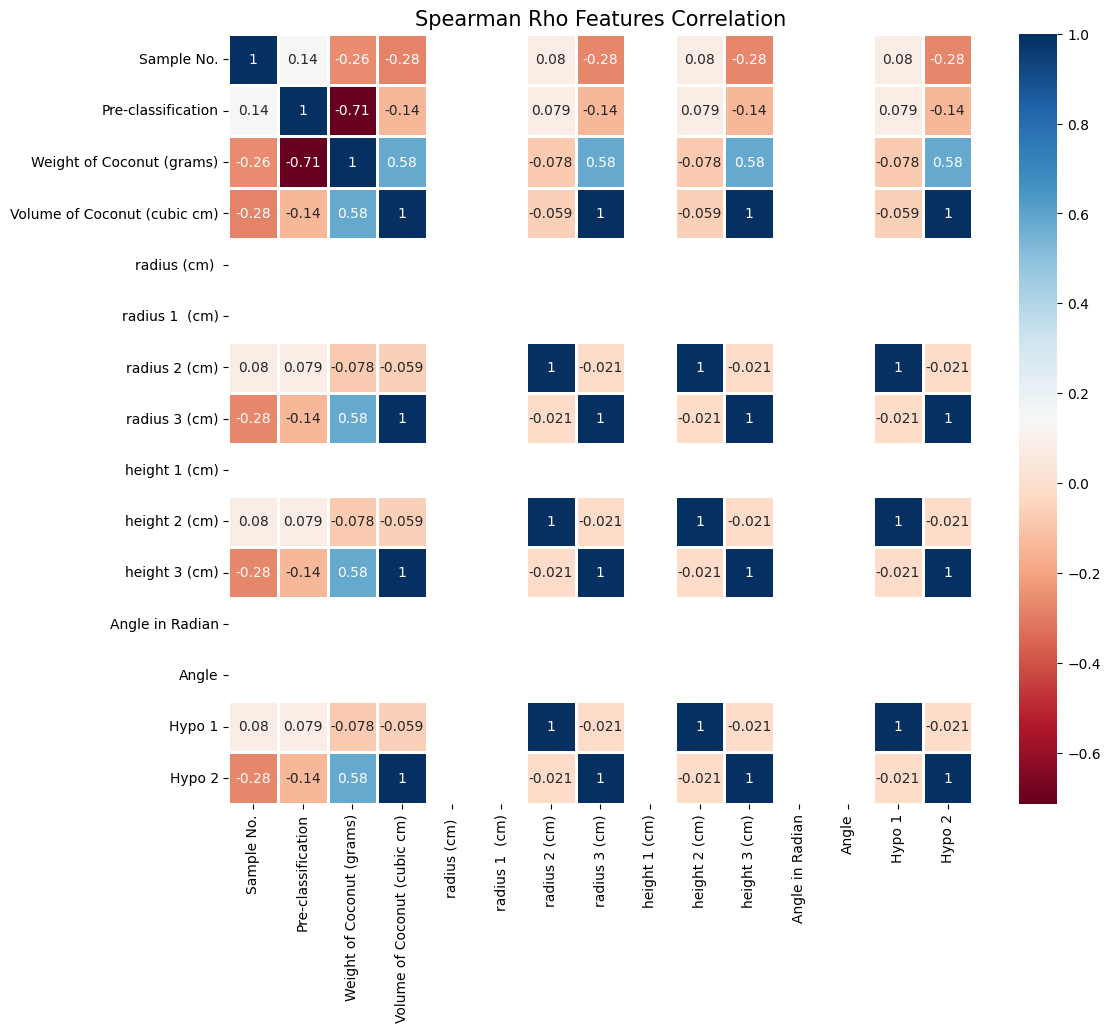

In [ ]:
# data.drop("Sample No.", axis=1, inplace=True)
cmap = plt.cm.RdBu
corr = data.corr(method = 'spearman')
plt.figure(figsize=(12,10))
plt.title('Spearman Rho Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)



In [ ]:
# Extract X and Y values from the DataFrame
x_values = data['Weight of Coconut (grams)']
y_values = data['Volume of Coconut (cubic cm)']

# Create a scatter plot
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Weight of Coconut (grams)')
plt.ylabel('Volume of Coconut (cubic cm)')
plt.title('Scatter Plot of Weight of Coconut (grams) vs Volume of Coconut (cubic cm)')

# Add legend
plt.legend()

# Display the plot
plt.show()

NameError: ignored

In [ ]:
# Extract X and Y values from the DataFrame
x_values = data['Weight of Coconut (grams)']
y_values = data['Volume of Water (mL)']

# Create a scatter plot
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Weight of Coconut (grams)')
plt.ylabel('Volume of Water (mL)')
plt.title('Scatter Plot of Weight of Coconut (grams) vs Volume of Water (mL)')

# Add legend
plt.legend()

# Display the plot
plt.show()

NameError: ignored

In [ ]:
# Extract X and Y values from the DataFrame
x_values = data['Weight of Coconut (grams)']
y_values = data['Meat Thickness(mm)']
print(x_values)
# Create a scatter plot
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')

# Add labels and title
plt.xlabel('Weight of Coconut (grams)')
plt.ylabel('Meat Thickness(mm)')
plt.title('Scatter Plot of Weight of Coconut (grams) vs Meat Thickness(mm)')

# Add legend
plt.legend()

# Display the plot
plt.show()